In [16]:
import cyvcf2
import seaborn as sns
import pandas as pd
import numpy as np

In [17]:
vcf_file = "/home/hain/EMBL/inversions/homology/final_inv_calls_homology.vcf"

In [18]:
data = []
for record in cyvcf2.VCF(vcf_file):
    data.append({"SV": record.ID, "SVTYPE": record.INFO["SVTYPE"], "SVLEN": record.INFO["SVLEN"], "HOMLEN": record.INFO.get("HOMLEN", 0)})
df = pd.DataFrame(data)
df["LOG10_SVLEN"] = df["SVLEN"].apply(lambda x: abs(x)).apply(lambda x: np.log10(x + 1))
df["LOG10_HOMLEN"] = df["HOMLEN"].apply(lambda x: abs(x)).apply(lambda x: np.log10(x + 1))

<Axes: xlabel='LOG10_SVLEN', ylabel='HOMLEN'>

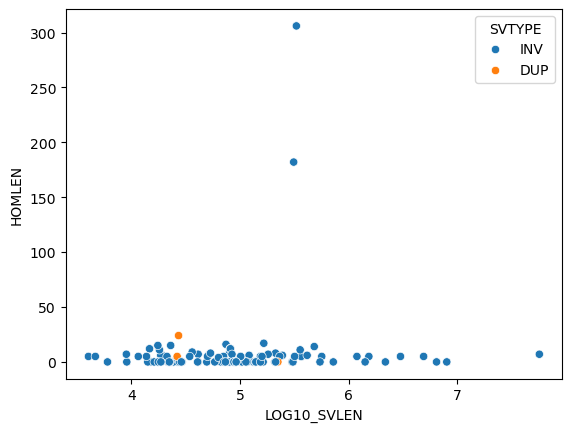

In [19]:
sns.scatterplot(data=df, x="LOG10_SVLEN", y="HOMLEN", hue="SVTYPE")

In [22]:
candidates = pd.read_csv("/home/hain/EMBL/inversions/homology/final_candidate_homology.bed", sep="\t", header=None, names=["chrom", "start", "end", "sv_id", "score", "strand"])

In [ ]:
candidates["HOMLEN"] = candidates["end"] - candidates["start"]
candidates["LOG10_HOMLEN"] = candidates["HOMLEN"].apply(lambda x: abs(x)).apply(lambda x: np.log10(x + 1))

<Axes: xlabel='HOMLEN', ylabel='Count'>

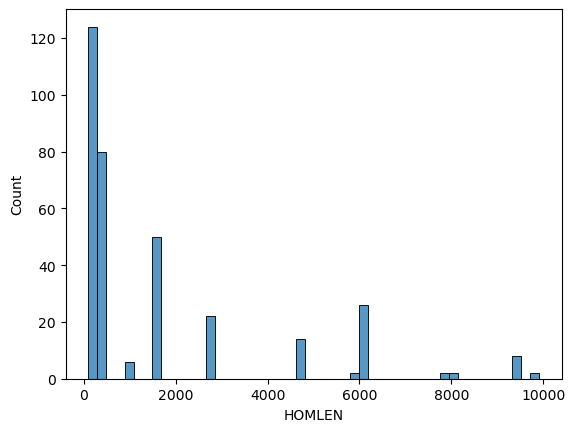

In [24]:
sns.histplot(data=candidates, x="HOMLEN", bins=50)